## QSAR Biodegradation dataset

### Dataset URL
https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

In [1]:
#Importing necessary packages
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in the dataset
df = pd.read_csv("biodeg.csv")

In [3]:
#Head of the dataset
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [4]:
#Shape of the dataset
df.shape

(1055, 42)

In [5]:
#The propotion of missing observations for each column of the dataset
df_missing = df.isna()
#df_missing.head()
df_num_missing = df_missing.sum()
proportion_missing = df_num_missing/len(df)
proportion_missing

SpMax_L        0.0
J_Dz(e)        0.0
nHM            0.0
F01[N-N]       0.0
F04[C-N]       0.0
NssssC         0.0
nCb            0.0
C%             0.0
nCp            0.0
nO             0.0
F03[C-N]       0.0
SdssC          0.0
HyWi_B(m)      0.0
LOC            0.0
SM6_L          0.0
F03[C-O]       0.0
Me             0.0
Mi             0.0
nN-N           0.0
nArNO2         0.0
nCRX3          0.0
SpPosA_B(p)    0.0
nCIR           0.0
B01[C-Br]      0.0
B03[C-Cl]      0.0
N-073          0.0
SpMax_A        0.0
Psi_i_1d       0.0
B04[C-Br]      0.0
SdO            0.0
TI2_L          0.0
nCrt           0.0
C-026          0.0
F02[C-N]       0.0
nHDon          0.0
SpMax_B(m)     0.0
Psi_i_A        0.0
nN             0.0
SM6_B(m)       0.0
nArCOOR        0.0
nX             0.0
class          0.0
dtype: float64

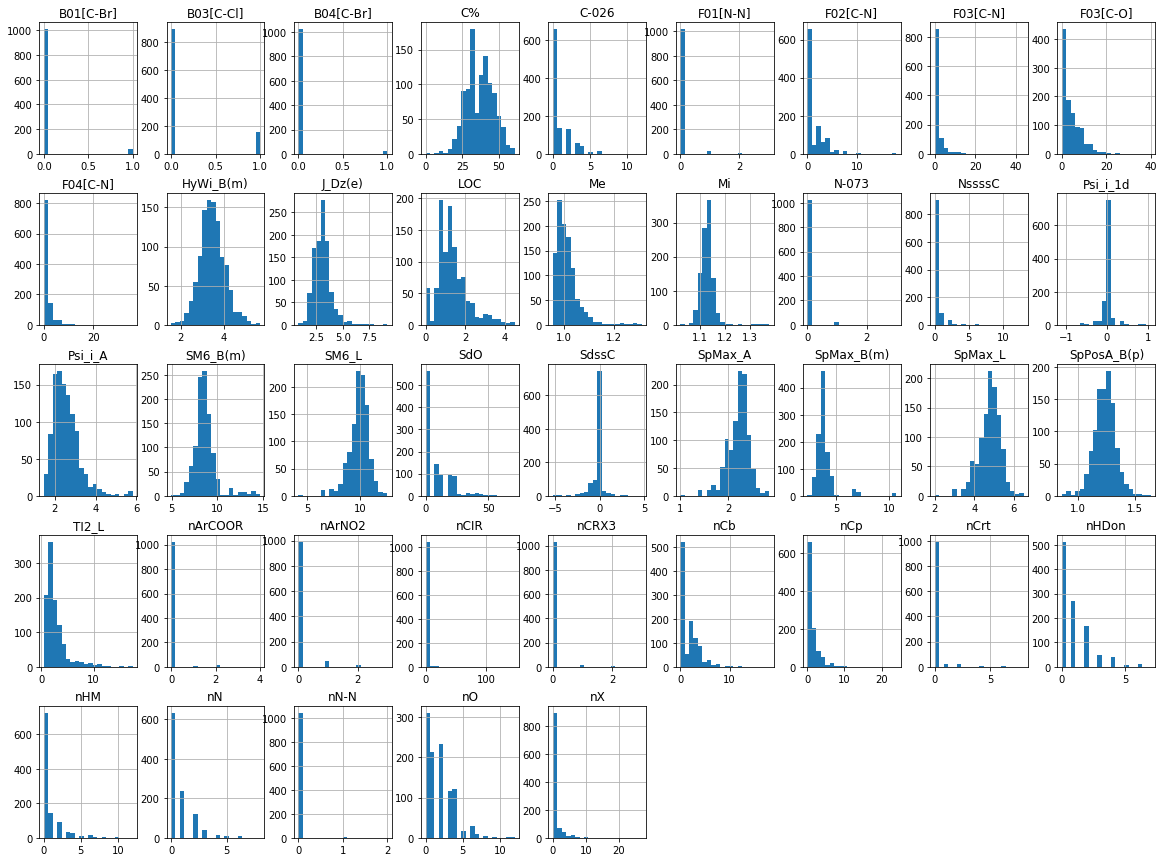

In [6]:
df_plot = df.hist(layout=(5,9), figsize=(20, 15), bins=20)

## The problem statement
To find relationship between the structures (attributes) and biodegradation (class) of chemicals. 

Classification models were developed in order to discriminate ready (356) and not ready (699) biodegradable molecules by means of three different modelling methods: k Nearest Neighbours, Partial Least Squares Discriminant Analysis and Support Vector Machines. Reference: "Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013). Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals. Journal of Chemical Information and Modeling, 53, 867-878."

Task/Objective: To build predictive models (Random Forest and Gradient Boosting classifiers) by incorporating grid search for selecting optimal hyperparameters.

### y-variable
To classify each chemical into 2 classes (ready biodegradable (RB) and not-ready biodegradable (NRB))

In [7]:
#Separating y-variable from the rest of the matrix
X = df.drop('class', axis = 1)
y = df['class']

In [8]:
X.shape, y.shape

((1055, 41), (1055,))

### Training and Test sets

In [9]:
#Using Scikit-learn to split data into training and test sets
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(738, 41) (738,)
(317, 41) (317,)


### Model Training: Random Forest Classifier

In [11]:
#Import the model
from sklearn.ensemble import RandomForestClassifier

#With 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Fit the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
#Make predictions on the test data
y_predict = rf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict))
print('Accuracy:',accuracy_score(y_test, y_predict))

Confusion matrix:
[[186  16]
 [ 32  83]]
Accuracy: 0.8485804416403786


#### Grid search for the optimal k hyperparameters for RandomForesrt Classifier

In [14]:
### Make a table of the grid search results
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
rf = RandomForestClassifier()

# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 20), "n_estimators": range(20, 100)}, 
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X_train, y_train)

# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
piv_df = cv_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df.style.background_gradient("nipy_spectral", axis=None)

In [15]:
#Make predictions on the test data using optimal hyperparameters from the grid search
y_predict_gscv = gscv.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict_gscv))
print('Accuracy:',accuracy_score(y_test, y_predict_gscv))

Confusion matrix:
[[184  18]
 [ 33  82]]
Accuracy: 0.8391167192429022


### Model Training: Gradient Boosting Classifier

In [17]:
#Import the model
from sklearn.ensemble import GradientBoostingClassifier

#With 100 decision trees
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 42)

#Fit the model on training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
#Make predictions on the test data
y_predict_gb = gb.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict_gb))
print('Accuracy:',accuracy_score(y_test, y_predict_gb))

Confusion matrix:
[[187  15]
 [ 33  82]]
Accuracy: 0.8485804416403786


#### Grid search for the optimal k hyperparameters for GradientBoosting Classifier

In [36]:
### Make a table of the grid search results
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
gb = GradientBoostingClassifier()


# Create grid search instance 
gscvgb = GridSearchCV(
    gb, 
    {"max_depth":range(5,10,1), "min_samples_split":range(20, 100, 5)},
    cv=kf, 
    n_jobs=-1
)
gscvgb.fit(X_train, y_train)

# Get cross-validation data
cv_df = pd.DataFrame(gscvgb.cv_results_)
piv_df = cv_df.pivot(index="param_max_depth",
           columns="param_min_samples_split",
           values="mean_test_score").round(3)
piv_df.style.background_gradient("nipy_spectral", axis=None)

param_min_samples_split,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
param_max_depth,,,,,,,,,,,,,,,,
5,0.86,0.863,0.866,0.878,0.869,0.864,0.864,0.867,0.866,0.859,0.86,0.871,0.859,0.858,0.855,0.864
6,0.867,0.869,0.87,0.869,0.871,0.864,0.869,0.864,0.877,0.866,0.87,0.867,0.867,0.859,0.854,0.864
7,0.867,0.863,0.862,0.874,0.866,0.862,0.863,0.87,0.87,0.869,0.87,0.869,0.858,0.864,0.863,0.863
8,0.86,0.87,0.87,0.869,0.864,0.869,0.869,0.867,0.87,0.87,0.87,0.864,0.863,0.869,0.871,0.866
9,0.873,0.87,0.871,0.878,0.877,0.863,0.863,0.858,0.873,0.874,0.867,0.862,0.852,0.864,0.867,0.862


In [37]:
#Make predictions on the test data using optimal hyperparameters from the grid search
y_predict_gscvgb = gscvgb.predict(X_test)

Text(91.68, 0.5, 'Predicted Label')

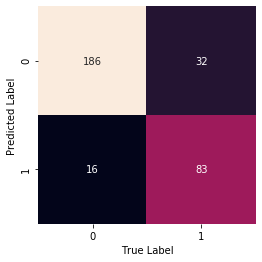

In [23]:
#Confusion matrix for RandomForest Classifier
rfmat = confusion_matrix(y_test, y_predict)
sns.heatmap(rfmat.T, square=True,annot = True, fmt="d", cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

Text(91.68, 0.5, 'Predicted Label')

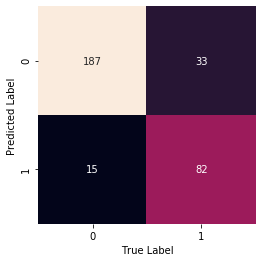

In [39]:
#Confusion matrix for GradientBoosting Classifier
gbmat = confusion_matrix(y_test, y_predict_gb)
sns.heatmap(gbmat.T, square=True,annot = True, fmt="d", cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

Text(91.68, 0.5, 'Predicted Label')

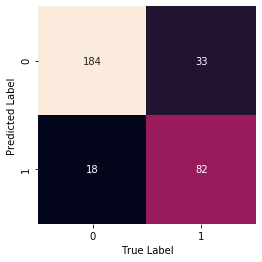

In [25]:
#Confusion matrix for RandomForest Classifier with grid search
gvscmat = confusion_matrix(y_test, y_predict_gscv)
sns.heatmap(gvscmat.T, square=True,annot = True, fmt="d", cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

Text(91.68, 0.5, 'Predicted Label')

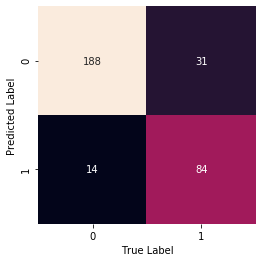

In [38]:
#Confusion matrix for GradientBoosting Classifier with grid search
gvscgbmat = confusion_matrix(y_test, y_predict_gscvgb)
sns.heatmap(gvscgbmat.T, square=True,annot = True, fmt="d", cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [40]:
from sklearn.metrics import accuracy_score

print('Accuracy:',accuracy_score(y_test, y_predict))
print('Accuracy:',accuracy_score(y_test, y_predict_gscv))
print('Accuracy:',accuracy_score(y_test, y_predict_gb))
print('Accuracy:',accuracy_score(y_test, y_predict_gscvgb))

Accuracy: 0.8485804416403786
Accuracy: 0.8391167192429022
Accuracy: 0.8485804416403786
Accuracy: 0.8580441640378549


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Grid search for tuning hyperparameters for GB classifier may improve the performances, but need more computational power to tune all the hyperparameters.